<a href="https://colab.research.google.com/github/tania-martynenko/KaggleX_Project/blob/main/Project_Part_II_v2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KaggleX_Project/Data/car_accident_preprecced_df.csv')

In [ ]:
pd.set_option('display.max_columns', None) #Show all columns

In [ ]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Weekday?,Crash Time,Crash Date,Driver Distracted Group,Year
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,Unknown,Unknown,Unknown,Unknown,OTHER,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,Unknown,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,Unknown,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)",weekday,15:00:00,2019-05-31,Others,2019
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,Unknown,Unknown,Unknown,Unknown,UNKNOWN,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,Unknown,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,UNKNOWN,39.199047,-77.250743,"(39.19904667, -77.25074333)",weekday,17:00:00,2019-05-24,NOT DISTRACTED,2019
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,County,SELFRIDGE RD,County,RANDOLPH RD,OTHER,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,Unknown,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,Yes,NO APPARENT INJURY,MD,8B61B8E0-5473-4C78-A654-6029684ABD03,SUPERFICIAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,East,East,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)",weekday,10:45:00,2023-07-17,Mental Distractions,2023
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,OTHER,UNKNOWN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,Unknown,E611A3F8-5F7D-465B-8DE0-3814027998F1,No,NO APPARENT INJURY,MD,1A592482-AF1F-49CE-8554-77EF7C55966B,SUPERFICIAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,South,East,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)",weekday,23:40:00,2023-07-20,NOT DISTRACTED,2023
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,SAME DIR REAR END,UNKNOWN,DRY,DAYLIGHT,NO CONTROLS,Unknown,3C7F6951-1701-44DC-9824-88DF4E32352E,Yes,NO APPARENT INJURY,MD,C2EF337E-5881-48ED-9B06-36D0BE00557C,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,"MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4...",MOVING CONSTANT SPEED,Unknown,Unknown,25,No,No,2001,KENWORTH,TRUCK,UNKNOWN,39.149085,-77.210731,"(39.14908542, -77.21073135)",weekday,17:40:00,2023-07-13,External Distractions,2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   161260 non-null  object 
 1   Local Case Number               161260 non-null  object 
 2   Agency Name                     161260 non-null  object 
 3   ACRS Report Type                161260 non-null  object 
 4   Route Type                      161260 non-null  object 
 5   Road Name                       161260 non-null  object 
 6   Cross-Street Type               161260 non-null  object 
 7   Cross-Street Name               161260 non-null  object 
 8   Collision Type                  161260 non-null  object 
 9   Weather                         161260 non-null  object 
 10  Surface Condition               161260 non-null  object 
 11  Light                           161260 non-null  object 
 12  Traffic Control 

In [ ]:
drop_columns = ['Report Number', 'Cross-Street Name', 'Local Case Number','Location', 'Agency Name', 'ACRS Report Type', 'Crash Date','Cross-Street Type', 'Person ID', 'Drivers License State', 'Vehicle ID', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Continuing Dir', 'Vehicle Going Dir','Driverless Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Crash Time', 'Year']

In [ ]:
df.drop(columns=drop_columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Route Type               161260 non-null  object 
 1   Road Name                161260 non-null  object 
 2   Collision Type           161260 non-null  object 
 3   Weather                  161260 non-null  object 
 4   Surface Condition        161260 non-null  object 
 5   Light                    161260 non-null  object 
 6   Traffic Control          161260 non-null  object 
 7   Driver Substance Abuse   161260 non-null  object 
 8   Driver At Fault          161260 non-null  object 
 9   Injury Severity          161260 non-null  object 
 10  Vehicle Damage Extent    161260 non-null  object 
 11  Vehicle Body Type        161260 non-null  object 
 12  Vehicle Movement         161260 non-null  object 
 13  Speed Limit              161260 non-null  int64  
 14  Park

2. Encoding Categorical Variables

In [ ]:
category_columns = ['Collision Type', 'Weather', 'Surface Condition', 'Light',
                   'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Vehicle Damage Extent', 'Vehicle Body Type',
                   'Vehicle Movement', 'Parked Vehicle', 'Equipment Problems',
                    'Driver Distracted Group', 'Route Type', 'Road Name', 'Weekday?']

numerical_columns = ['Speed Limit', 'Latitude', 'Longitude']

In [ ]:
label_encoder = LabelEncoder()
for column in category_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Route Type               161260 non-null  int64  
 1   Road Name                161260 non-null  int64  
 2   Collision Type           161260 non-null  int64  
 3   Weather                  161260 non-null  int64  
 4   Surface Condition        161260 non-null  int64  
 5   Light                    161260 non-null  int64  
 6   Traffic Control          161260 non-null  int64  
 7   Driver Substance Abuse   161260 non-null  int64  
 8   Driver At Fault          161260 non-null  int64  
 9   Injury Severity          161260 non-null  object 
 10  Vehicle Damage Extent    161260 non-null  int64  
 11  Vehicle Body Type        161260 non-null  int64  
 12  Vehicle Movement         161260 non-null  int64  
 13  Speed Limit              161260 non-null  int64  
 14  Park

In [ ]:
target_column = df['Injury Severity'].value_counts()
target_column

NO APPARENT INJURY          131459
POSSIBLE INJURY              16818
SUSPECTED MINOR INJURY       11471
SUSPECTED SERIOUS INJURY      1362
FATAL INJURY                   150
Name: Injury Severity, dtype: int64

In [ ]:
severity_mapping = {
    'NO APPARENT INJURY': 0,
    'POSSIBLE INJURY': 1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4
}

In [ ]:
df['Injury Severity'] = df['Injury Severity'].map(severity_mapping)

In [ ]:
df['Injury Severity'].value_counts()

0    131459
1     16818
2     11471
3      1362
4       150
Name: Injury Severity, dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Route Type               161260 non-null  int64  
 1   Road Name                161260 non-null  int64  
 2   Collision Type           161260 non-null  int64  
 3   Weather                  161260 non-null  int64  
 4   Surface Condition        161260 non-null  int64  
 5   Light                    161260 non-null  int64  
 6   Traffic Control          161260 non-null  int64  
 7   Driver Substance Abuse   161260 non-null  int64  
 8   Driver At Fault          161260 non-null  int64  
 9   Injury Severity          161260 non-null  int64  
 10  Vehicle Damage Extent    161260 non-null  int64  
 11  Vehicle Body Type        161260 non-null  int64  
 12  Vehicle Movement         161260 non-null  int64  
 13  Speed Limit              161260 non-null  int64  
 14  Park

#### 3. Feature Scaling

In [ ]:
X = df.drop('Injury Severity', axis=1)
y = df['Injury Severity']

In [ ]:
y.value_counts()

0    131459
1     16818
2     11471
3      1362
4       150
Name: Injury Severity, dtype: int64

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test.value_counts()

0    39422
1     5114
2     3407
3      389
4       46
Name: Injury Severity, dtype: int64

## Modeling

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Logistic regression with balanced class weights

In [ ]:
# Check the distribution of classes in y_train
class_distribution = Counter(y_train)
class_distribution

Counter({0: 92037, 1: 11704, 2: 8064, 3: 973, 4: 104})

Class 0 to have 10 times the number of samples of Class 4:

In [ ]:
# Randomly undersample majority class to about 10 times of minority class

sampling_strategy = {0: 1040}  # 10 times the size of the minority class
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state = 42)

X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 92037, 1: 11704, 2: 8064, 3: 973, 4: 104})
Distribution of class labels after resampling Counter({1: 11704, 2: 8064, 0: 1040, 3: 973, 4: 104})


In [ ]:
clf_base = LogisticRegression(solver='saga', multi_class='multinomial')

grid = {'C': 10.0 ** np.arange(-2, 3),
        'penalty': ['l1', 'l2'],
        'class_weight': ['balanced']}

clf_lr = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_lr.fit(X_train_res, y_train_res)

coef = clf_lr.best_estimator_.coef_

intercept = clf_lr.best_estimator_.intercept_

print ("Metrics report on test data: \n", classification_report(y_test, clf_lr.predict(X_test)))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.92      0.52      0.67     39422
           1       0.16      0.32      0.21      5114
           2       0.10      0.15      0.12      3407
           3       0.02      0.41      0.04       389
           4       0.02      0.78      0.04        46

    accuracy                           0.47     48378
   macro avg       0.24      0.44      0.21     48378
weighted avg       0.77      0.47      0.57     48378



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_res = RandomForestClassifier(class_weight='balanced')
clf_res.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_pred_train_res = clf_res.predict(X_train_res)

In [ ]:
# Evaluate
print("Metrics report on train data: \n", classification_report(y_train_res, y_pred_train_res))

Metrics report on train data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00     11704
           2       1.00      1.00      1.00      8064
           3       1.00      1.00      1.00       973
           4       1.00      1.00      1.00       104

    accuracy                           1.00     21885
   macro avg       1.00      1.00      1.00     21885
weighted avg       1.00      1.00      1.00     21885



In [ ]:
y_pred_test_res = clf_res.predict(X_test)
# Evaluate
print("Metrics report on test data: \n", classification_report(y_test, y_pred_test_res ))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.99      0.07      0.13     39422
           1       0.11      0.81      0.19      5114
           2       0.12      0.25      0.16      3407
           3       0.11      0.02      0.03       389
           4       0.57      0.09      0.15        46

    accuracy                           0.16     48378
   macro avg       0.38      0.25      0.13     48378
weighted avg       0.83      0.16      0.14     48378



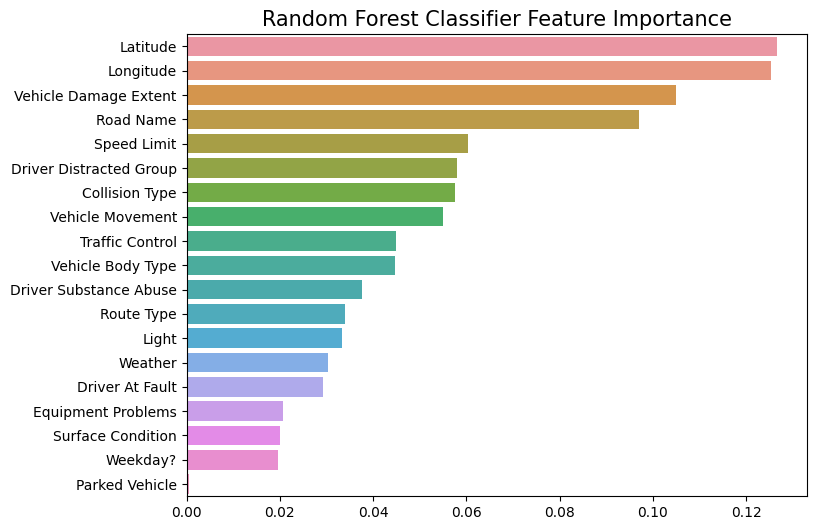

In [ ]:
import seaborn as sns
importances = pd.DataFrame(np.zeros((X_train_res.shape[1], 1)), columns=['importance'], index=df.drop('Injury Severity',axis=1).columns)

importances.iloc[:,0] = clf_res.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()

Notes: rf.score(X_test,y_test)
rf.score(X_train,y_train)

### EASYENSEMBLE

In [ ]:
#sampling_strategy = {
#    0: 1040,  # 10 times the size of the minority class
#    1: 11704,
#    2: 8064,
#    3: 973,
#    4: 104
#}

In [ ]:
sampling_strategy1 = {
    0: 1040  # 10 times the size of the minority class
}

In [ ]:
sampling_strategy2 = {
    0: 208,   # Twice the size of class 4
    1: 156,  # 1.5 times the size of class 4
    2: 130  # 1.25 times the size of class 4
    # Leave out 3 and 4 so they remain the same size
}

In [ ]:
# n folds random under-sampling

def multi_rus(X, y, n_folds, sampling_strategy2):
    X_res = [None] * n_folds
    y_res = [None] * n_folds
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    for i in range(n_folds):
        X_res[i], y_res[i] = rus.fit_resample(X, y)

    return X_res, y_res

In [ ]:
X_train_res, y_train_res = multi_rus(X_train, y_train, 3, sampling_strategy2)
y_pred_proba = np.zeros(len(y_test))

for i in range(len(y_train_res)):

    clf = RandomForestClassifier(n_estimators=100, max_features='auto')
    clf.fit(X_train_res[i], y_train_res[i])
    y_pred_proba += clf.predict(X_test)

y_pred_proba = y_pred_proba/len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.36      0.52     39422
           1       0.13      0.86      0.23      5114
           2       0.00      0.00      0.00      3407
           3       0.00      0.00      0.00       389
           4       0.00      0.00      0.00        46

    accuracy                           0.39     48378
   macro avg       0.21      0.24      0.15     48378
weighted avg       0.77      0.39      0.45     48378



 ### Balanced Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
clf_brf = BalancedRandomForestClassifier()
clf_brf.fit(X_train_res, y_train_res)
#chaeck score train

BalancedRandomForestClassifier()

In [ ]:
y_pred = clf_brf.predict(X_test)
print("Metrics report on test data: \n", classification_report(y_test, y_pred))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.92      0.54      0.68     39422
           1       0.15      0.38      0.21      5114
           2       0.11      0.21      0.14      3407
           3       0.04      0.30      0.06       389
           4       0.02      0.89      0.04        46

    accuracy                           0.50     48378
   macro avg       0.25      0.46      0.23     48378
weighted avg       0.77      0.50      0.59     48378



### XGBoost

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth': 6,
    'eta': 0.3
}

bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = bst.predict(dtest)

print("Metrics report on test data: \n",classification_report(y_test, y_pred_xgb))


Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     39422
           1       0.27      0.01      0.02      5114
           2       0.29      0.03      0.05      3407
           3       0.25      0.07      0.11       389
           4       0.67      0.17      0.28        46

    accuracy                           0.81     48378
   macro avg       0.46      0.26      0.27     48378
weighted avg       0.72      0.81      0.74     48378



In [ ]:
dtrain_res = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth': 6,
    'eta': 0.3
}

bst_res = xgb.train(params, dtrain_res, num_boost_round=100)

y_pred_xgb_res = bst_res.predict(dtest)

print("Metrics report on test data: \n",classification_report(y_test, y_pred_xgb_res))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.99      0.13      0.23     39422
           1       0.12      0.79      0.20      5114
           2       0.11      0.28      0.16      3407
           3       0.17      0.07      0.10       389
           4       0.26      0.15      0.19        46

    accuracy                           0.21     48378
   macro avg       0.33      0.28      0.18     48378
weighted avg       0.83      0.21      0.22     48378



Smote,random sampling method

max_depth = 10,11,etc and criterion = ‘gini’
Criterion = ‘entropy’